In [2]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
def plot_data(pl, X, y):
        # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)
    
    return plt


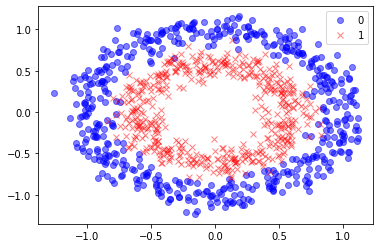

In [3]:
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
pl = plot_data(plt, X, y)
pl.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [6]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
model.add(Dense(4, activation="tanh", name="Hidden-2"))
model.add(Dense(1, activation="sigmoid", name="Output_layer"))

In [7]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
from keras.utils import plot_model

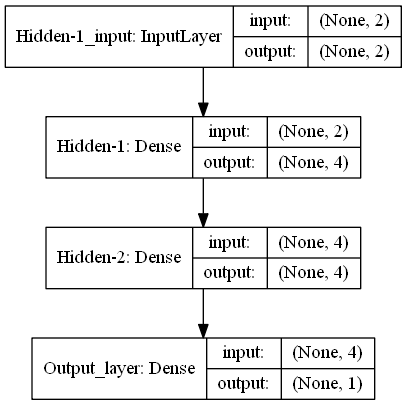

In [8]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [9]:
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='acc', patience=5, mode=max)]

C:\Users\CSDT\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:788: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [10]:
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks)

Epoch 1/100
700/700 [==============================] - 0s 134us/step - loss: 0.6939 - accuracy: 0.5457
Epoch 2/100
700/700 [==============================] - 0s 22us/step - loss: 0.6474 - accuracy: 0.6343
Epoch 3/100
700/700 [==============================] - 0s 22us/step - loss: 0.6336 - accuracy: 0.6571
Epoch 4/100
700/700 [==============================] - 0s 22us/step - loss: 0.5937 - accuracy: 0.7086
Epoch 5/100
700/700 [==============================] - 0s 22us/step - loss: 0.5644 - accuracy: 0.7229
Epoch 6/100
700/700 [==============================] - 0s 45us/step - loss: 0.5488 - accuracy: 0.7100
Epoch 7/100
700/700 [==============================] - 0s 22us/step - loss: 0.5324 - accuracy: 0.7400
Epoch 8/100
700/700 [==============================] - 0s 22us/step - loss: 0.5221 - accuracy: 0.7471
Epoch 9/100
700/700 [==============================] - 0s 22us/step - loss: 0.5056 - accuracy: 0.7571
Epoch 10/100
 32/700 [>.............................] - ETA: 0s - loss: 0.4805 - 

C:\Users\CSDT\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


700/700 [==============================] - 0s 22us/step - loss: 0.4448 - accuracy: 0.8114
Epoch 11/100
700/700 [==============================] - 0s 45us/step - loss: 0.3704 - accuracy: 0.8657
Epoch 12/100
700/700 [==============================] - 0s 22us/step - loss: 0.3220 - accuracy: 0.8800
Epoch 13/100
700/700 [==============================] - 0s 22us/step - loss: 0.2576 - accuracy: 0.9157
Epoch 14/100
700/700 [==============================] - 0s 22us/step - loss: 0.2296 - accuracy: 0.9214
Epoch 15/100
700/700 [==============================] - 0s 22us/step - loss: 0.2120 - accuracy: 0.9257
Epoch 16/100
700/700 [==============================] - 0s 45us/step - loss: 0.1641 - accuracy: 0.9514
Epoch 17/100
700/700 [==============================] - 0s 22us/step - loss: 0.1451 - accuracy: 0.9671
Epoch 18/100
700/700 [==============================] - 0s 22us/step - loss: 0.1498 - accuracy: 0.9457
Epoch 19/100
700/700 [==============================] - 0s 22us/step - loss: 0.1280 - 

700/700 [==============================] - 0s 22us/step - loss: 0.0761 - accuracy: 0.9700
Epoch 90/100
700/700 [==============================] - 0s 22us/step - loss: 0.0628 - accuracy: 0.9771
Epoch 91/100
700/700 [==============================] - 0s 22us/step - loss: 0.0774 - accuracy: 0.9657
Epoch 92/100
700/700 [==============================] - 0s 45us/step - loss: 0.0780 - accuracy: 0.9729
Epoch 93/100
700/700 [==============================] - 0s 22us/step - loss: 0.0840 - accuracy: 0.9686
Epoch 94/100
700/700 [==============================] - 0s 22us/step - loss: 0.0808 - accuracy: 0.9743
Epoch 95/100
700/700 [==============================] - 0s 22us/step - loss: 0.0552 - accuracy: 0.9814
Epoch 96/100
700/700 [==============================] - 0s 45us/step - loss: 0.0530 - accuracy: 0.9800
Epoch 97/100
700/700 [==============================] - 0s 22us/step - loss: 0.0756 - accuracy: 0.9729
Epoch 98/100
700/700 [==============================] - 0s 22us/step - loss: 0.0533 - 

In [11]:
eval_result = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 52us/step


In [12]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])



Test loss: 0.16276015498985846 Test accuracy: 0.9233333468437195


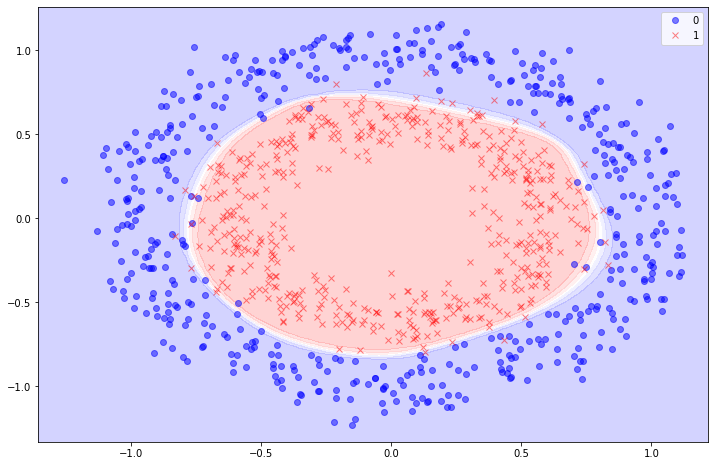

In [13]:
plot_decision_boundary(model, X, y).show()